# Task (a)

In [1]:
auto = read.table('./data/auto.data', header=TRUE, na.strings='?')
auto = na.omit(auto)
auto[['origin']] = as.factor(auto[['origin']])
auto[['cylinders']] = as.factor(auto[['cylinders']])
head(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


### Quantitative predictors

In [2]:
numerical_vars = colnames(auto)[sapply(auto, is.numeric)]
numerical_vars

[1] "mpg"          "displacement" "horsepower"   "weight"       "acceleration"
[6] "year"

### Qualitative predictors

In [3]:
categorical_vars = colnames(auto)[sapply(auto, is.factor)]
categorical_vars

[1] "cylinders" "origin"    "name"

# Task (b)
range

In [4]:
auto_num_ranges = t(sapply(auto[numerical_vars], range))
colnames(auto_num_ranges) = c('min', 'max')
auto_num_ranges

,min,max
mpg,9,46.6
displacement,68,455.0
horsepower,46,230.0
weight,1613,5140.0
acceleration,8,24.8
year,70,82.0


# Task (c)
mean, std

In [5]:
mean_std = data.frame(sapply(auto[numerical_vars], mean), sapply(auto[numerical_vars], sd))
colnames(mean_std) = c('mean', 'std')
mean_std

,mean,std
,<dbl>,<dbl>
mpg,23.44592,7.805007
displacement,194.41199,104.644004
horsepower,104.46939,38.491160
weight,2977.58418,849.402560
acceleration,15.54133,2.758864
year,75.97959,3.683737


# Task (d)
Remove 10th - 85th observations. Mean and std of remains?

In [6]:
remains = auto[-seq(10, 85),]
mean_std_remains = data.frame(sapply(remains[numerical_vars], mean), sapply(remains[numerical_vars], sd))
colnames(mean_std_remains) = c('mean', 'std')
mean_std_remains

,mean,std
,<dbl>,<dbl>
mpg,24.40443,7.867283
displacement,187.24051,99.678367
horsepower,100.72152,35.708853
weight,2935.97152,811.300208
acceleration,15.72690,2.693721
year,77.14557,3.106217


# Task (e)

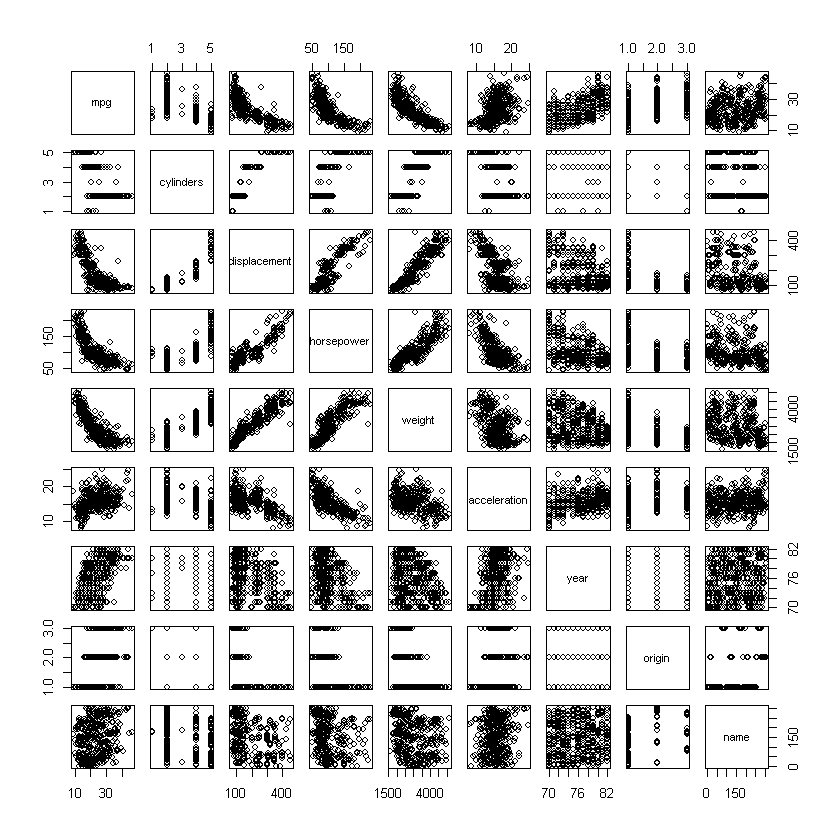

In [7]:
pairs(auto)

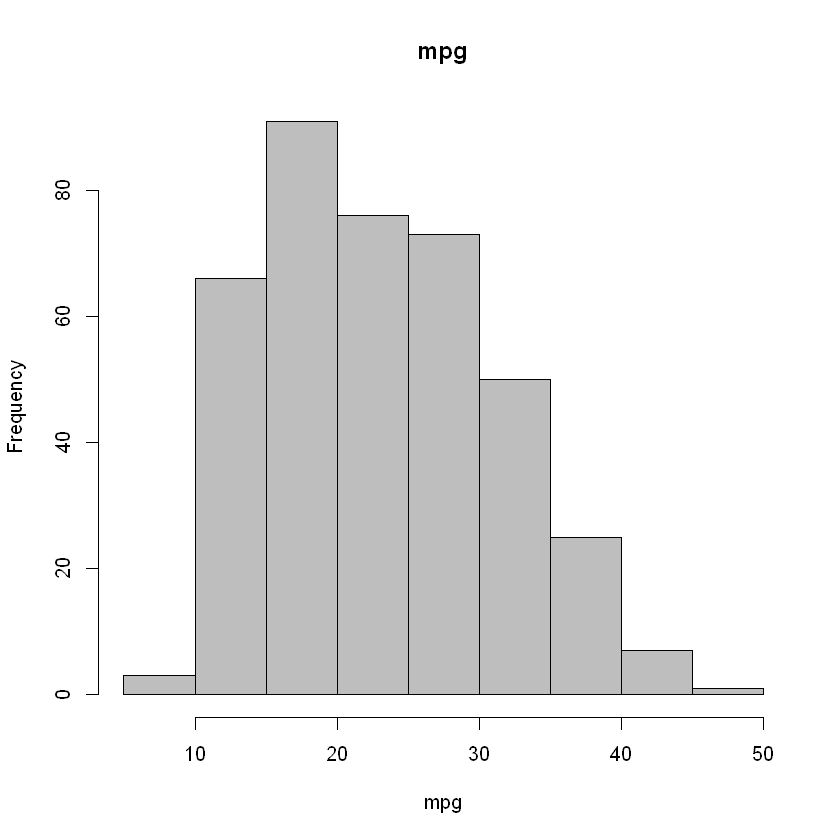

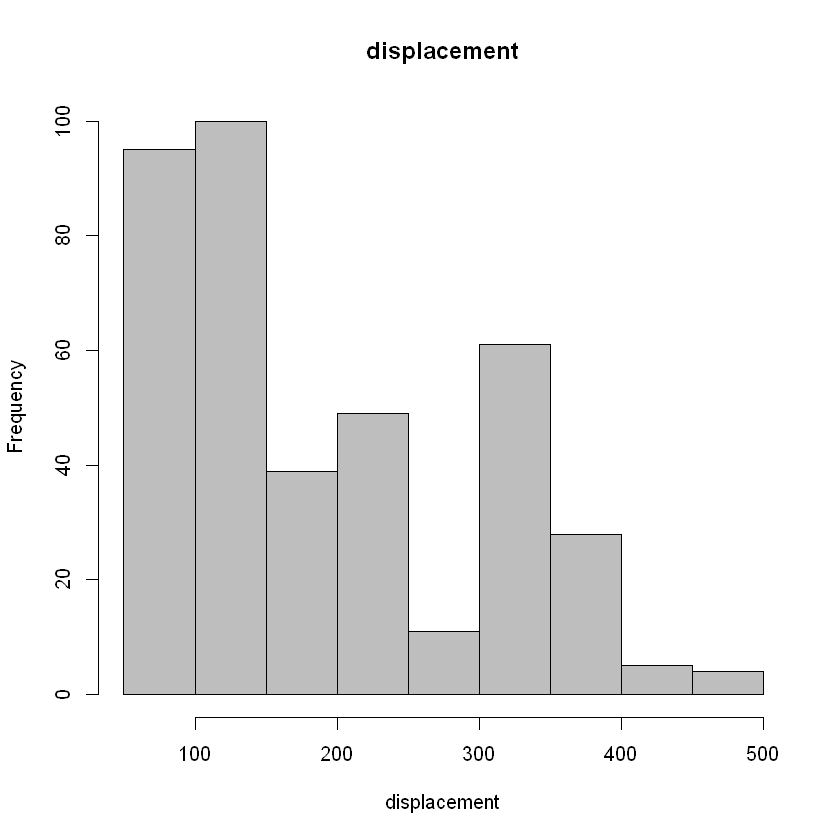

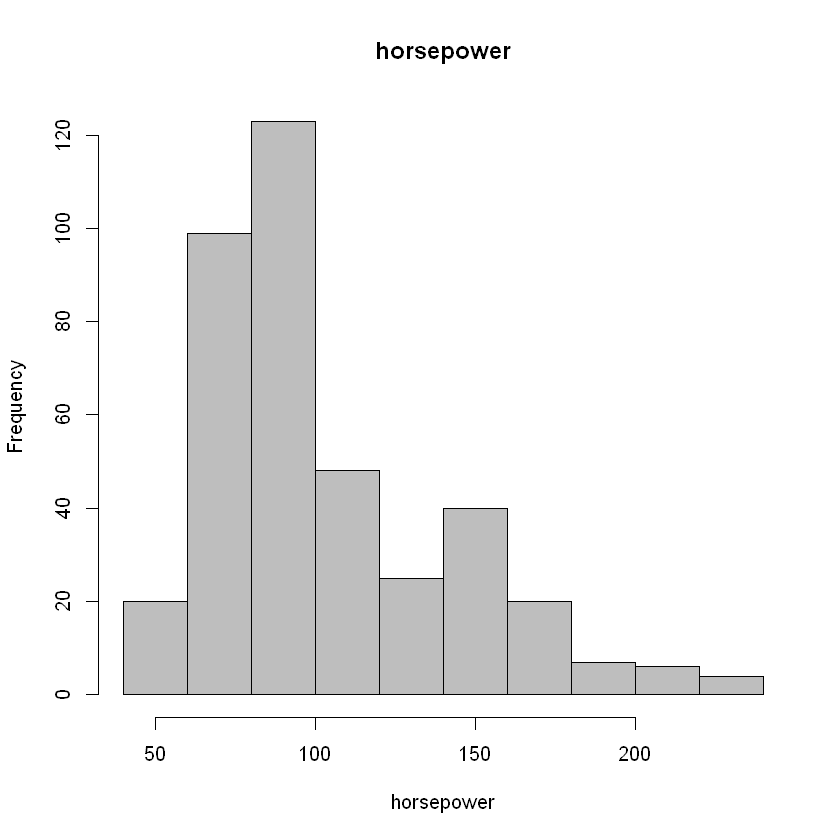

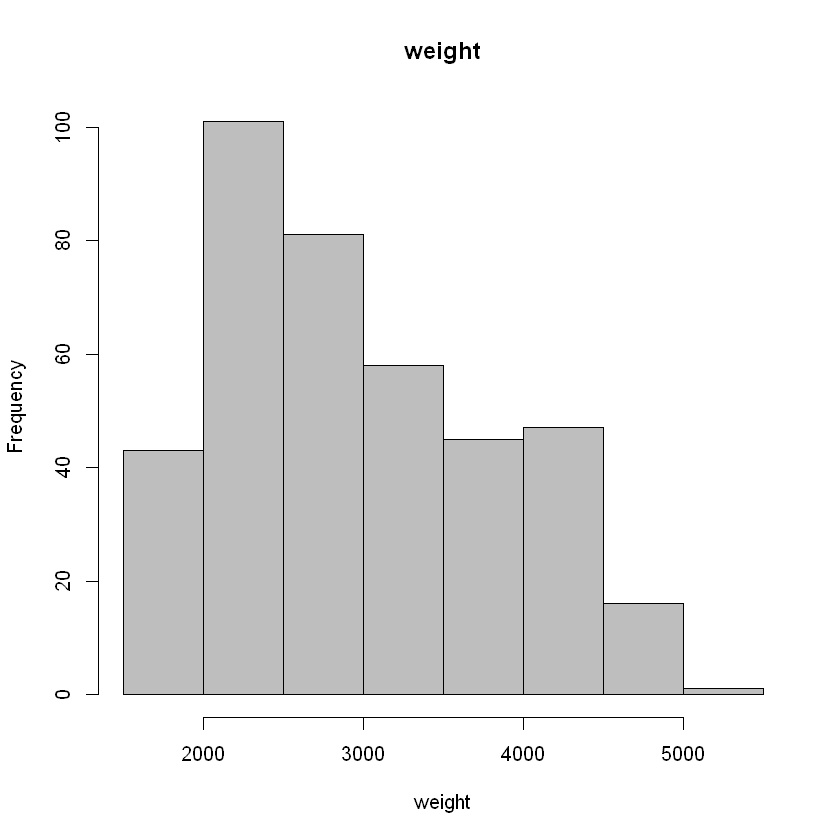

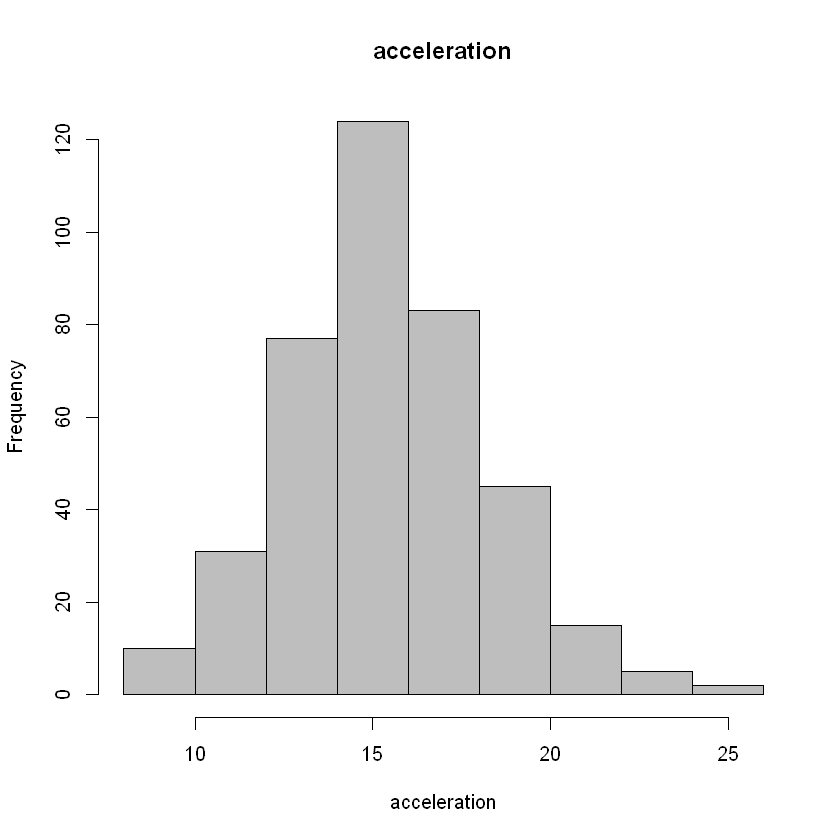

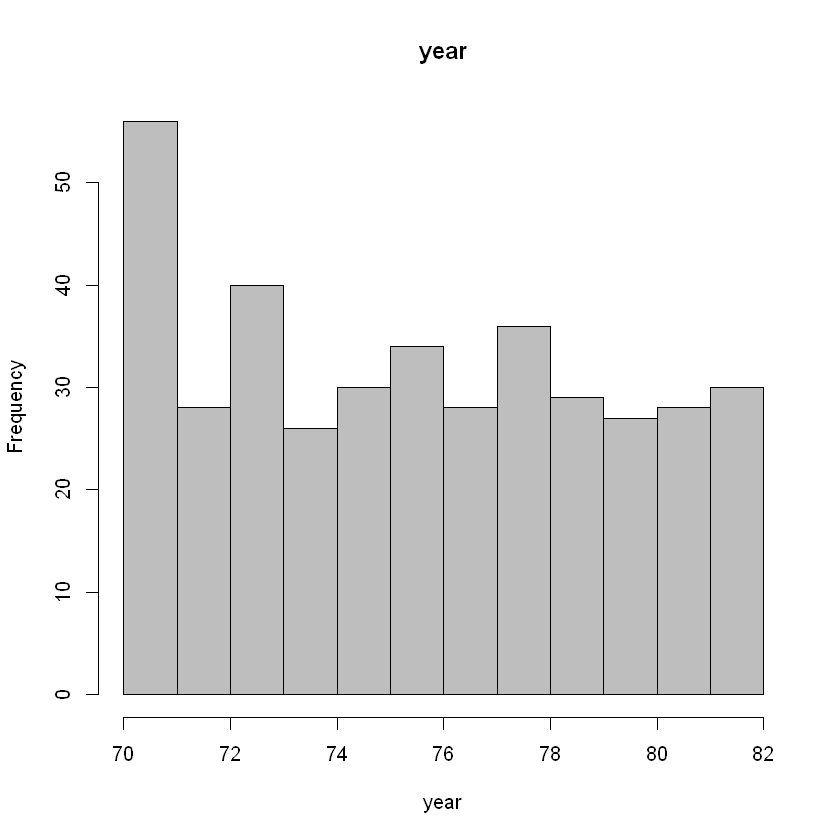

In [8]:
for (colname in numerical_vars) {
    hist(auto[[colname]], col='gray', main=colname, xlab=colname)
}

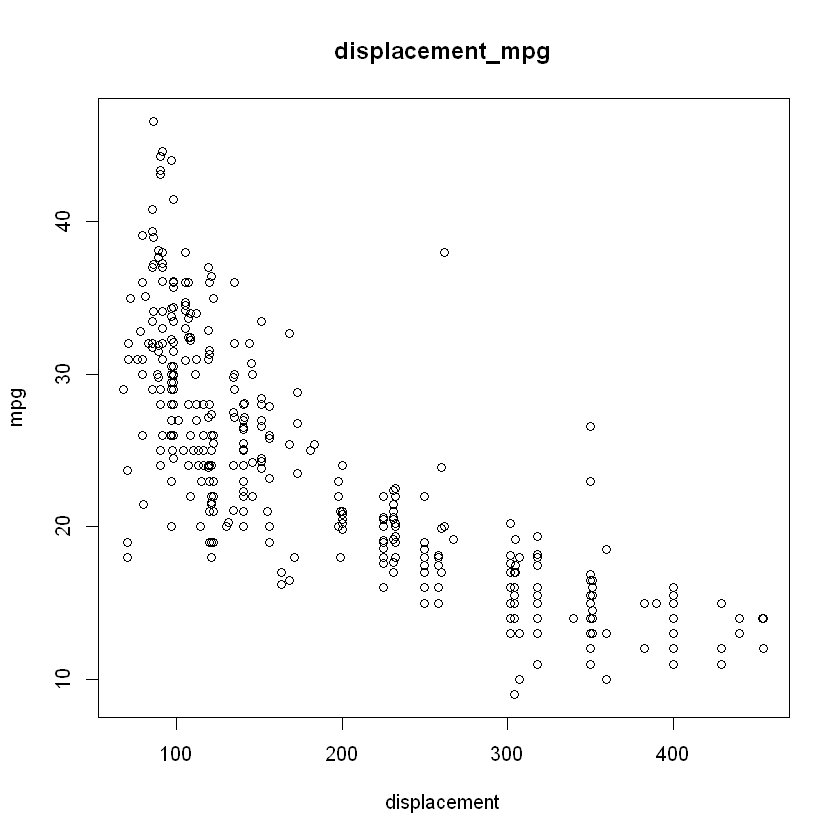

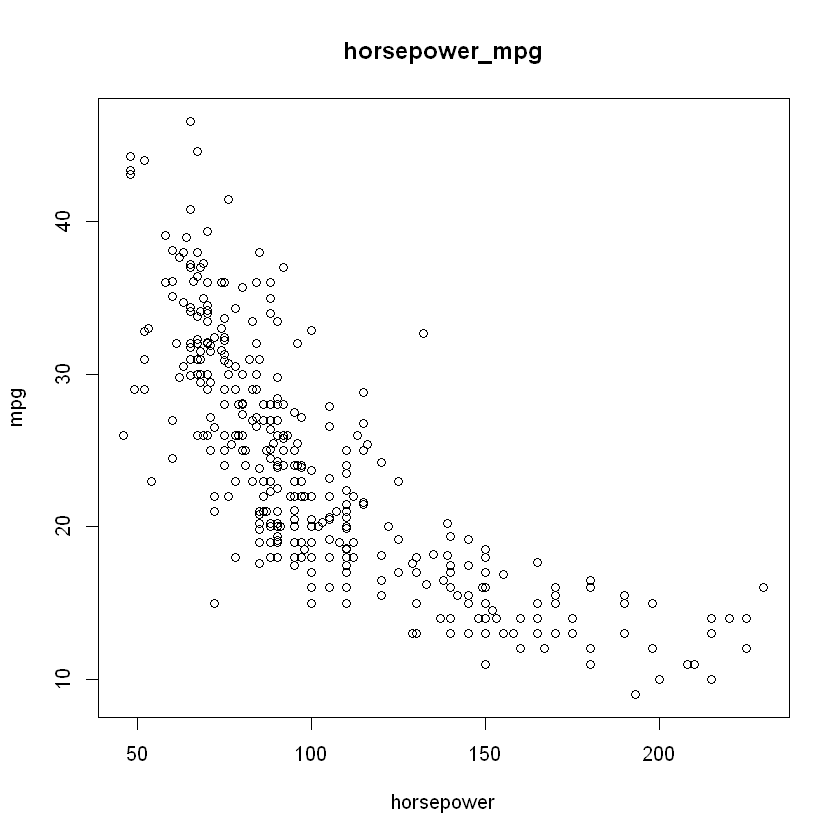

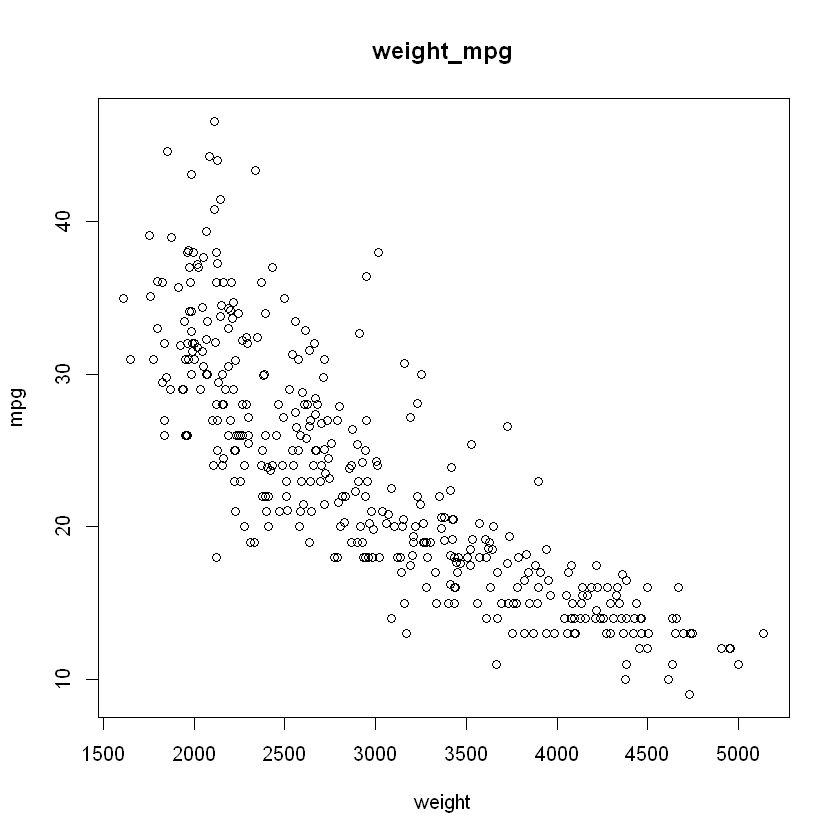

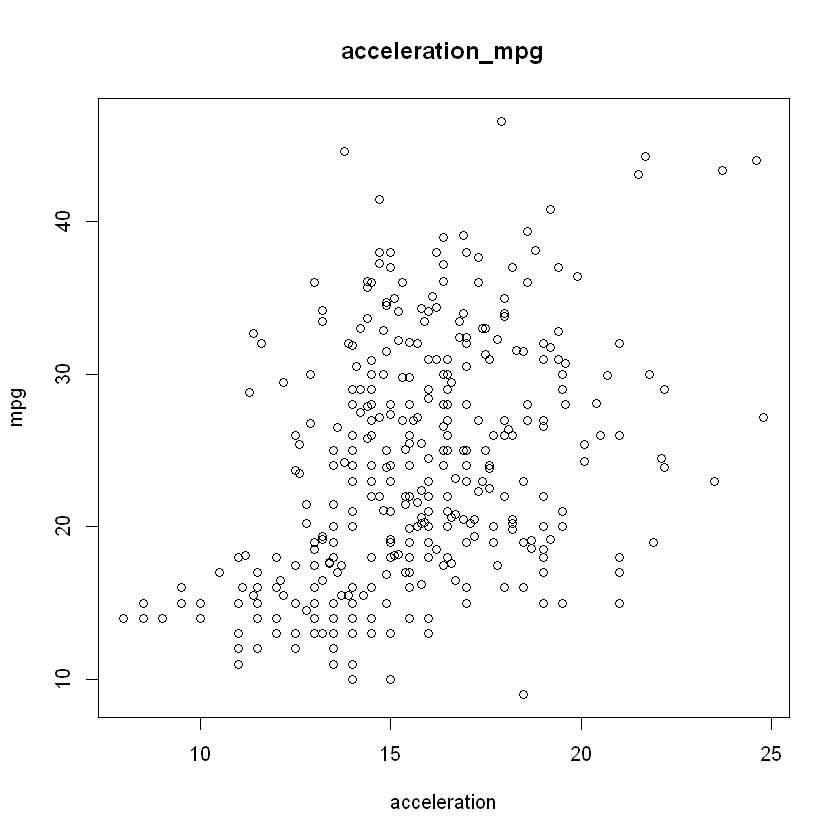

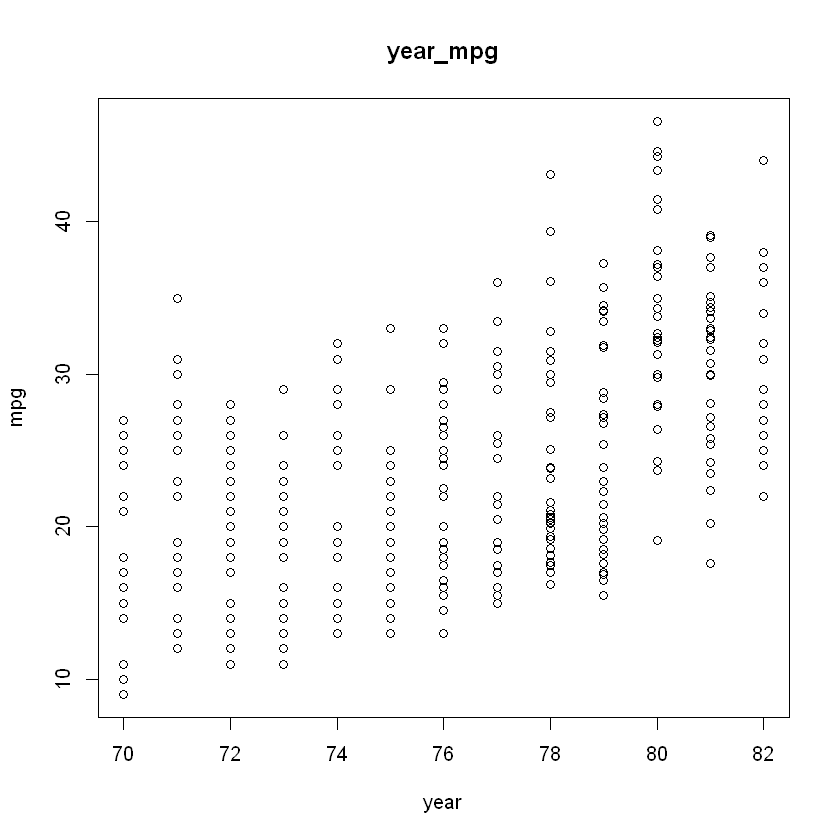

In [9]:
for (colname in numerical_vars) {
    if (colname != 'mpg') {
        plot(
            auto[[colname]], auto[['mpg']], 
            main=paste(colname,'mpg',sep='_'),
            xlab=colname, ylab='mpg'
        )
    }
}

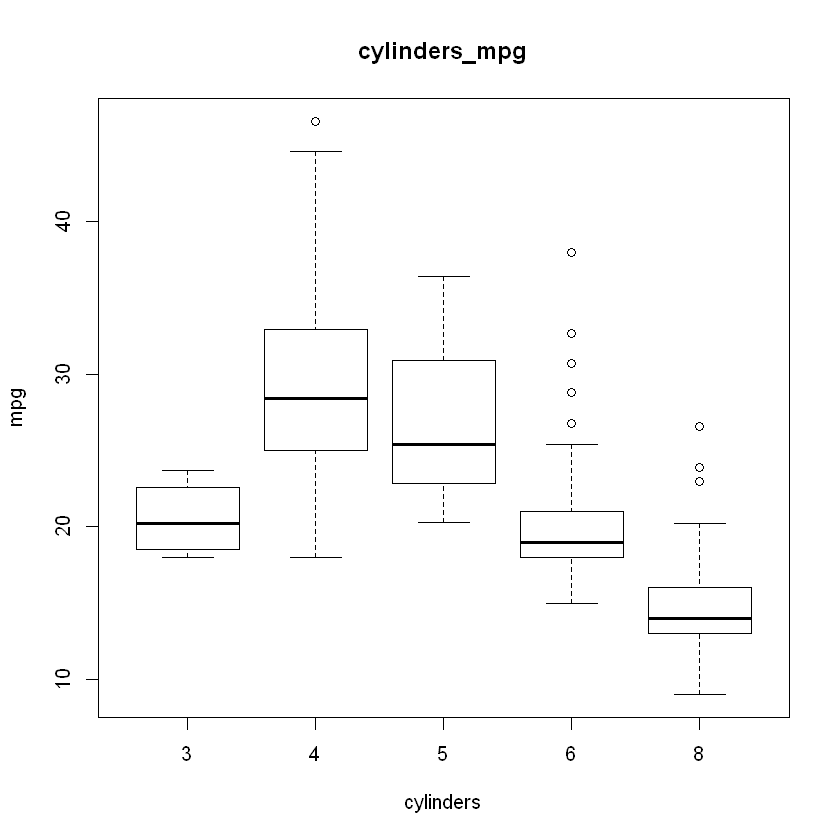

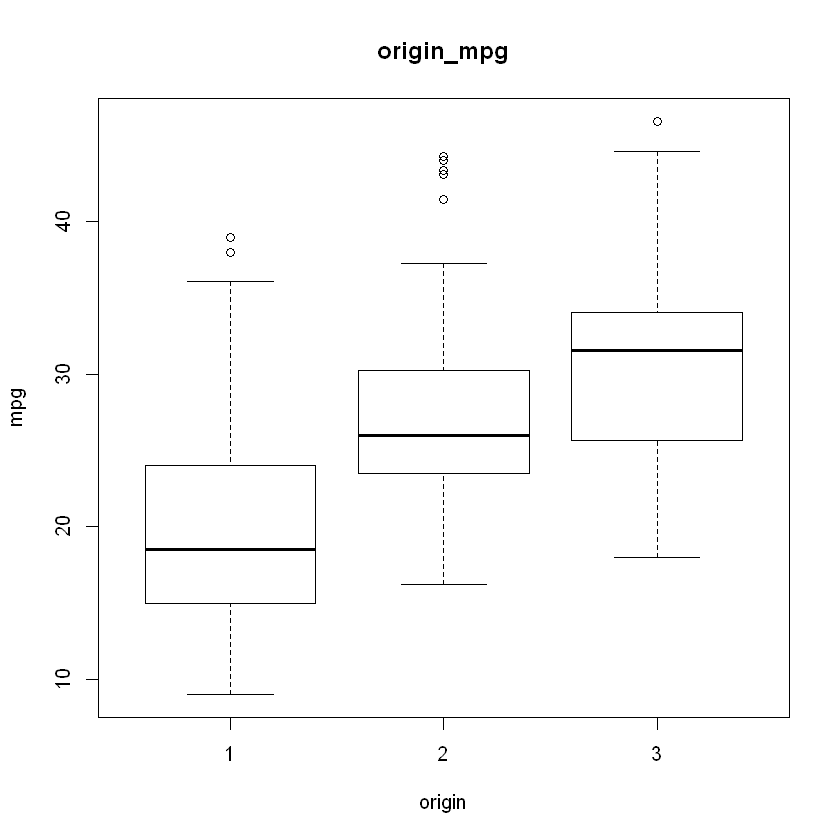

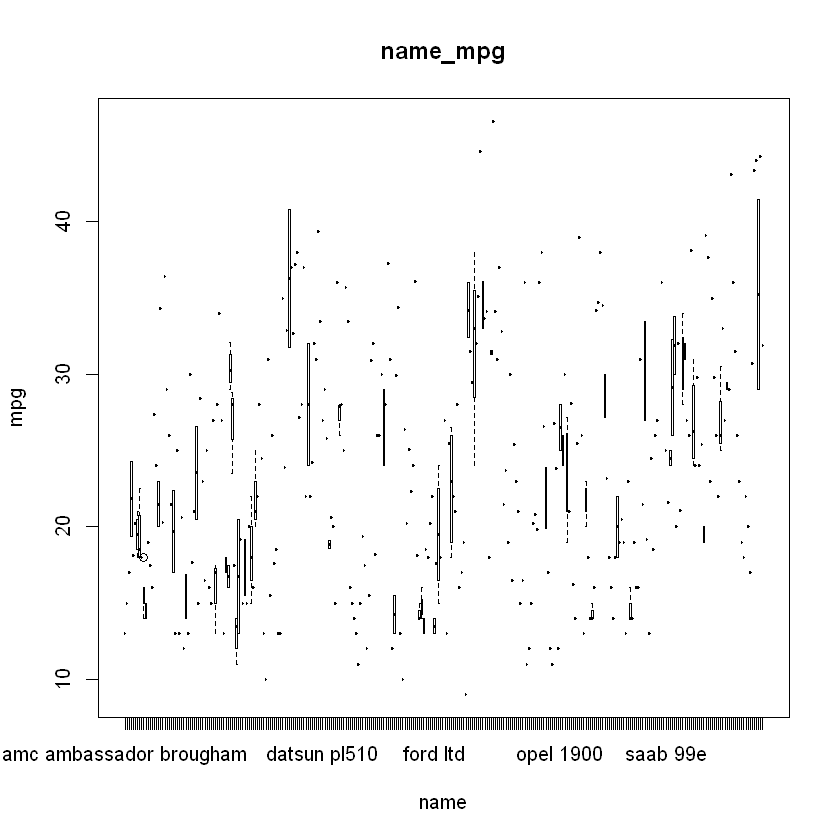

In [10]:
for (colname in categorical_vars) {
    if (colname != 'mpg') {
        plot(
            auto[[colname]], auto[['mpg']], 
            main=paste(colname,'mpg',sep='_'),
            xlab=colname, ylab='mpg'
        )
    }
}

# Task (f)

**From the scatterplots between mpg and other numerical variables we have plotted, many varibles seem to have a good collinearity with the target - mpg. The following variables which show a clear collinearity with the target should be useful for a linear regression model to predict the mpg:**
* Displacements
* Horsepower
* Weight
* Year

**From the barplots between mpg and other categorical variables, we can see a clear dependence of the following variables to our target - mpg:**
* Cylinders
* Origin